# Artificaill Inteligence Assignment

Department of Computing and Informatics,
Faculty of Science and Technology,
Bournemouth University.

## 1. Introduction

    

Physical activity recognition is an integral part of athlete workload management in professional sports and patient management related to ilnesses such as chronic kidney deceases. This work is focussed on physical activity detection of individuals using the sensory data obtained from wearable sensors.

## 2. Problem Definition








Physical activity recognition requires to distinguish different physical movements carried out by the individuals such as walking, running, cycling, etc. This requires accurate prediction of physical movements using sensory data such as videos, accelerometer readings, and heart rate measurements. We have obtained accellerometer readings from five wearable sensors placed in wrists, anckles and chest of athletes as shown in Figure 1. It is required to analyze the data to accurately predict the actual activities carried out by the individuals while wearing the sensors.



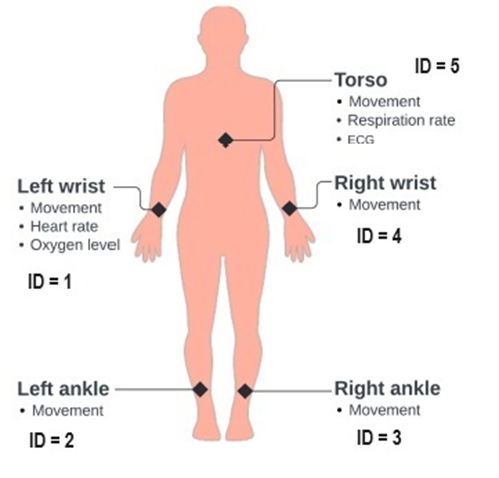

                            Figure 1




We hypothesize that machine learning models can accurately predict the activities carried out by athletes, including running, walking, and exercising. Further, the model will be able to identify the out of distribution (OOD) data samples such as cycling

##3. Objectives



Aim:
Our aim is to accurately predict athlete activities using accelerometer readings obtained by wearable sensors


Objectives:
1.	Carry out a study on supervised learning techniques and chose ML algorithms that can be used for activity recognition.
2.	Use identified ML algorithms to predict the class of the activities carried out by athletes using accelerometer readings.
3.	Compare the ML algorithms based on the accuracy of results.
4.	Identify the most significant sensor position or combination of sensor positions in activity recognition.


## 4. Description of Data

Each accellerometer reading consist of data from three different axises making it fifteen different axises for five sensors. Sensor readings are denoted by X_i, Y_i, Z_i, where i ∈ {1,2,3,4,5} denotes the sensor ID as given in Figre 1.Data is obtained for six activities namely, walking, running, Push-ups, Squats,Cycling, and playing Table tennis. One .csv file is created for each each activity. Howevr, the number of readings obtained each activity is not the same.

##5. Analysis

Data is read from the .csv files and analysed after cleaning and preprocessing.

###5.1. Load Libraries

Load the required python libraries for general data manipulation and data analysis using machine learning.

In [1]:
# Load Libraries
#Libraries for data manipulation
#from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Libraries for data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Libraries for validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Libraries for Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras import layers
#Utility libraries
import time
from scipy import interpolate

In [2]:
import warnings

warnings.filterwarnings('ignore')

###5.2. Read data files

Data files can be stored in the local folder or the local google drive. If the file is not found ilocally found, the program will search for the file in specified remote google drive.

####5.2.1 Define file names

In [3]:
import os

cycling = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Cycling.csv"
cycling_1 = "Cycling.csv"
cycling_2 ="https://drive.google.com/file/d/1pjVqvGlm_TPEb8x2ZyDkY17LShmCoBvG/view?usp=drive_link"
pushup = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Pushup.csv"
pushup_1 = "Pushup.csv"
pushup_2 = "https://drive.google.com/file/d/1yF2hqwdfTpDvpUhDDlaA0QOKIN0GG8CI/view?usp=drive_link"
run = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Run.csv"
run_1 = "Run.csv"
run_2 = "https://drive.google.com/file/d/1ortW7OL4gmOvIT40RDa0lgrd1Sg6c7NI/view?usp=drive_link"
squat= "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Squat.csv"
squat_1 = "Squat.csv"
squat_2 = "https://drive.google.com/file/d/1qFXds2VnypOw8aq5SM0VhaQiajF0RZSR/view?usp=drive_link"
tennis = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Table Tennis.csv"
tennis_1 = "Table Tennis.csv"
tennis_2 = "https://drive.google.com/file/d/1N6-PTB5XqsiVLGjVulX1abzJRSXnchuY/view?usp=drive_link"
walk = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Walk.csv"
walk_1 = "Walk.csv"
walk_2 = "https://drive.google.com/file/d/1CavHOnkKbsls_GtnSUMp6Knju3W1a3Hi/view?usp=drive_link"

activityList = ['cycling','pushup','run','squat','tennis','walk']
fileNames = [[cycling,cycling_1,cycling_2],
            [pushup,pushup_1,pushup_2],
             [run,run_1,run_2],
             [squat,squat_1,squat_2],
             [tennis,tennis_1,tennis_2],
             [walk,walk_1,walk_2]]
names = ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5','Activity']
#dtypes = {'X1': int, 'Y1': int, 'Z1': int, 'X2': int, 'Y2': int, 'Z2': int, 'X3': int, 'Y3': int, 'Z3': int,
#        'X4': int, 'Y4': int, 'Z4': int, 'X5': int, 'Y5': int, 'Z5': int, 'Activity': str}


####5.2.2 Open files

In [4]:
raw_data = [] # List to store data

# Function to get the file name (check the local google drive and local folder)
def get_file_name(name, name1_1):
  if os.path.exists(name):
      return name
  elif os.path.exists(name1_1):
      return name1_1
  else:
      raise FileNotFoundError(f"File does not exist in local google drive...Reading from the shared google drive ...")

# Read data from all six activities
# Get the file name from local google drive, it not get it from shared google drive
# Open the file, read data, and append data to to data[] list
for index in range(0,6):
  try:
      path = get_file_name(fileNames[index][0],fileNames[index][1])
      print("Path: ",path)
  except FileNotFoundError as e:
      print(e)
      path = fileNames[index][2]

  try:
      raw_data.append(pd.read_csv(path,names=names,skiprows=1))
      print("File successfully read....")
      print(raw_data[index].head(2))
      print(raw_data[index].tail(2))
  except Exception as e:
      # Handle the error if reading the CSV file fails
      print("Error reading file:", e)


Path:  /content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Cycling.csv
File successfully read....
    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   

  Activity  
0    Cycle  
1    Cycle  
        X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
52444  430  504  458  613  543  536  361  562  538  526  488  417  515  379   
52445  373  457  452  608  538  541  324  542  553  587  478  394  517  366   

        Z5 Activity  
52444  527    Cycle  
52445  529    Cycle  
Path:  /content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Pushup.csv
File successfully read....
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  

###5.3 Cleaning the data set

#### 5.3.1 Check the size of data sets

In [ ]:
# check the shape of six data sets
for index in range(0,6):
  print(activityList[index],':',raw_data[index].shape)
  print(raw_data[index].info())
  print('\n')

cycling : (52446, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52446 entries, 0 to 52445
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   X1        52446 non-null  int64 
 1   Y1        52446 non-null  int64 
 2   Z1        52446 non-null  int64 
 3   X2        52446 non-null  int64 
 4   Y2        52446 non-null  int64 
 5   Z2        52446 non-null  int64 
 6   X3        52446 non-null  int64 
 7   Y3        52446 non-null  int64 
 8   Z3        52446 non-null  int64 
 9   X4        52446 non-null  int64 
 10  Y4        52446 non-null  int64 
 11  Z4        52446 non-null  int64 
 12  X5        52446 non-null  int64 
 13  Y5        52446 non-null  int64 
 14  Z5        52446 non-null  int64 
 15  Activity  52446 non-null  object
dtypes: int64(15), object(1)
memory usage: 6.4+ MB
None


pushup : (6844, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 16 columns):


####5.3.2 Remove Nulls

##### Check for Null values

In [ ]:
data = raw_data.copy()
#Check for Null records
for index in range(0,6):
  print(activityList[index])
  print('.................')
  print(data[index].isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          1
Y1          1
Z1          1
X2          1
Y2          1
Z2          1
X3          1
Y3          1
Z3          1
X4          1
Y4          1
Z4          1
X5          1
Y5          1
Z5          1
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          2219
Y1          2219
Z1          2219
X2          2219
Y2          2219
Z2          2219
X3          2219
Y3          2219
Z3          2219
X4          2219
Y4          2219

##### Remove Null values and check again

In [ ]:
for index in range(0,6):
  data[index].replace('', np.nan, inplace=True)
  data[index].dropna(inplace=True)
  print(activityList[index])
  print('.................')
  print(data[index].isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5  

In [ ]:
#Remove Null records
dataWithoutNulls = []

for index in range(0,6):
  nulls = data[index].isnull().any(axis=1)
  dataWithoutNulls.append(data[index][~nulls])


# Display the shape of each dataset after removing Nulls
for index in range(0,6):
  print(activityList[index],':',dataWithoutNulls[index].shape)

#clear memory : If we need the data we can comment this out
#del(data)

cycling : (52446, 16)
pushup : (6843, 16)
run : (9987, 16)
squat : (12229, 16)
tennis : (67699, 16)
walk : (20300, 16)


#### 5.3.3 Remove duplicates

In [ ]:
# identify duplicates and remove them
dataWithoutDup = []
for index in range(0,6):
  dups = dataWithoutNulls[index].duplicated()
  print(activityList[index])
  print('.................')
  print("Number of duplicates before romoving:", dups.sum())

  dataWithoutDup.append(dataWithoutNulls[index][~dups])

  dups = dataWithoutDup[index].duplicated()
  print("Number of duplicates after removing:", dups.sum())
  print('\n')

#clear memory : If we need the data we can comment this out
#del(dataWithoutNulls)

cycling
.................
Number of duplicates before romoving: 0
Number of duplicates after removing: 0


pushup
.................
Number of duplicates before romoving: 0
Number of duplicates after removing: 0


run
.................
Number of duplicates before romoving: 21
Number of duplicates after removing: 0


squat
.................
Number of duplicates before romoving: 11
Number of duplicates after removing: 0


tennis
.................
Number of duplicates before romoving: 18
Number of duplicates after removing: 0


walk
.................
Number of duplicates before romoving: 35
Number of duplicates after removing: 0




###5.4 Pre-process the data

#### 5.4.1 Encode the labels

In [ ]:
#Each data set is indexed
for index in range(0,6):
  dataWithoutDup[index]['Activity']= index
  print(dataWithoutDup[index].head(5))


    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   
2  491  558  371  634  517  501  376  488  511  634  623  381  528  370  508   
3  514  567  376  641  523  509  380  493  517  623  654  383  537  374  511   
4  519  567  384  645  523  512  380  493  523  605  654  399  540  378  511   

   Activity  
0         0  
1         0  
2         0  
3         0  
4         0  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   
2  383.0  499.0  475.0  561.0  592.0  540.0  465.0  620.0  551.0  617.0   
3  386.0  505.0  480.0  557.0  605.0  542.0  473.0  629.0  558.0  625.0   
4  386.0  508.0  483.0  555.0  620.0  548.0  473.0  632.0  5

<ipython-input-9-03bc5227708e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutDup[index]['Activity']= index
<ipython-input-9-03bc5227708e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutDup[index]['Activity']= index
<ipython-input-9-03bc5227708e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

#### 5.4.2 Combining the data sets to one

In [ ]:
dataset = pd.concat(dataWithoutDup, ignore_index=True)
# Shape of the combined dataset
print("Shape of combined dataset:", dataset.shape)

print(dataset.groupby('Activity').size())
#clear memory
#del(dataWithoutNulls)

Shape of combined dataset: (169419, 16)
Activity
0    52446
1     6843
2     9966
3    12218
4    67681
5    20265
dtype: int64


####5.4.3 Scaling the numerical fields

Scaling values of each feature into a common range

In [ ]:
dfPrep = dataset.copy()
# Scalling
from sklearn.preprocessing import MinMaxScaler
colNames = names[0:15]

scaler = MinMaxScaler()
dfPrep[colNames] = scaler.fit_transform(dfPrep[colNames])

####5.4.4 Visualize data

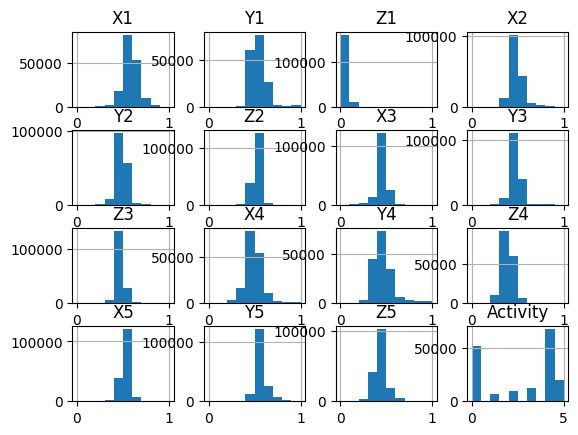

In [ ]:
dfPrep.hist()
plt.show()

##### Correlation matrix between features

In [ ]:
matrix = dfPrep.corr(numeric_only=True)
print(matrix)

                X1        Y1        Z1        X2        Y2        Z2  \
X1        1.000000 -0.053142 -0.066646 -0.107628  0.106517 -0.080777   
Y1       -0.053142  1.000000  0.250624  0.036730 -0.025801 -0.142223   
Z1       -0.066646  0.250624  1.000000  0.110449 -0.119127 -0.056561   
X2       -0.107628  0.036730  0.110449  1.000000 -0.160731  0.081406   
Y2        0.106517 -0.025801 -0.119127 -0.160731  1.000000  0.368120   
Z2       -0.080777 -0.142223 -0.056561  0.081406  0.368120  1.000000   
X3       -0.098559 -0.037664 -0.076334 -0.151759  0.043120 -0.033820   
Y3       -0.195401 -0.193845 -0.073430  0.038280 -0.166251  0.081981   
Z3       -0.147305 -0.111621  0.028209  0.108038 -0.028044  0.152446   
X4       -0.189848  0.116535  0.039479 -0.059759  0.166363  0.135360   
Y4       -0.248517  0.513222  0.248924  0.093666 -0.135262 -0.138321   
Z4       -0.089420  0.272123  0.414096  0.031825  0.017948 -0.111286   
X5       -0.035695 -0.065969 -0.079885  0.025517 -0.028391 -0.02

##### Heatmap of the correlatoin matrix

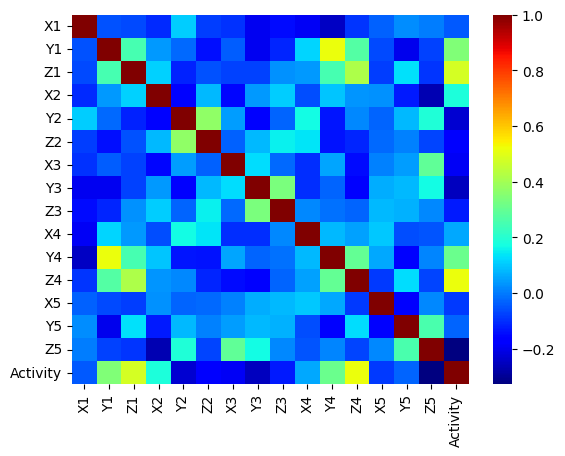

In [ ]:
import seaborn as sns
#sns.heatmap(matrix,cmap="coolwarm")
sns.heatmap(matrix,cmap="jet")
plt.show()



*   It can be observed that there is very low correlation between the features.

*   There is some correlation between Y1 and Y4 which is around 0.51

*   It is interesting to see that the activity has some correlation with Z1 and Z4

###5.5 Analyze data

####5.5.1 Split data into training and testing data

In [ ]:
x = dfPrep.drop(columns=['Activity'])
y = dfPrep['Activity']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

##### Visualize the train and test data

In [ ]:
print(X_train[0:4])
print('\n',Y_train[0:4])
print(X_test[0:4])
print('\n',Y_test[0:4])

              X1        Y1        Z1        X2        Y2        Z2        X3  \
143326  0.647979  0.614837  0.093188  0.532006  0.475216  0.500000  0.466667   
41444   0.641460  0.509146  0.059685  0.482219  0.454741  0.520788  0.450314   
66634   0.194263  0.911585  0.069891  0.378378  0.448276  0.503282  0.910692   
165936  0.418514  0.479675  0.076104  0.547653  0.496767  0.516411  0.454088   

              Y3        Z3        X4        Y4        Z4        X5        Y5  \
143326  0.426029  0.416178  0.307250  0.560292  0.371991  0.583942  0.539867   
41444   0.493882  0.508792  0.529344  0.386114  0.350109  0.510949  0.561462   
66634   0.497219  0.535756  0.892980  0.870889  0.423414  0.459854  0.641196   
165936  0.444939  0.475967  0.553510  0.400731  0.447484  0.496350  0.556478   

              Z5  
143326  0.484483  
41444   0.486207  
66634   0.410345  
165936  0.346552  

 143326    4
41444     0
66634     2
165936    5
Name: Activity, dtype: int64
              X1        

####5.5.2 Compare different supervised learning models

In [ ]:
models = []
models.append(('LR',LogisticRegression(solver='saga', multi_class='multinomial', C=1.0, penalty='l2', class_weight=None, max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', n_components=None, priors=None)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier())) #modleik4gi34r
models.append(('AdaBoost',AdaBoostClassifier())) #ejfreuifhg
models.append(('CART',DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, splitter='best')))

In [ ]:
for model_name, model in models:   # a loop to choose the model defined in the above code
    results = cross_validate(model, x, y, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=True)

    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1_macro'].mean(), '| test: ', results['test_f1_macro'].mean())
    print("---------------------------------------------------------")

LR:
Accuracy: train:  0.9127754070069785 | test:  0.8959086195608794
F1-score: train:  0.8781862181828558 | test:  0.8574244969812206
---------------------------------------------------------
LDA:
Accuracy: train:  0.8683559524968617 | test:  0.8472895555756244
F1-score: train:  0.8014547951122154 | test:  0.7765797772632544
---------------------------------------------------------
KNN:
Accuracy: train:  0.9964968501554743 | test:  0.958941792144782
F1-score: train:  0.9961446415124694 | test:  0.9527578788885614
---------------------------------------------------------
NB:
Accuracy: train:  0.9437828590698881 | test:  0.9344463343904765
F1-score: train:  0.9329285968608201 | test:  0.9232283077625321
---------------------------------------------------------
RandomForest:
Accuracy: train:  1.0 | test:  0.9637699854136722
F1-score: train:  1.0 | test:  0.9612092658607327
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8143743051149095 | test:  0.8

Highest accuracy and the F1 value are with the RandomForest algorithm. Therefore, we resort to RandomForest algorithm.

As the number of data points per label is not the same, the data set is not balanced. We can either undersample or oversample to balance the data set. We choose to random undersample the data set to match the reequency of each label is equal to the minimum frequency out of all.

####5.5.3 Random under sampling to make data sets equal in size

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

print("Class distribution before under-sampling:")
print(dataset.groupby('Activity').size())

# Separate features and target variable
x = dfPrep.drop(columns=['Activity'])
y = dfPrep['Activity']

# Perform random under-sampling
rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

# Check the class distribution after under-sampling
print("\nClass distribution after under-sampling:")
print(y_resampled.value_counts())

Class distribution before under-sampling:
Activity
0    52446
1     6843
2     9966
3    12218
4    67681
5    20265
dtype: int64

Class distribution after under-sampling:
0    6843
1    6843
2    6843
3    6843
4    6843
5    6843
Name: Activity, dtype: int64


In [ ]:
model_name = 'RandomForest'
model = RandomForestClassifier()
results = cross_validate(model, x_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=True)

print(model_name + ":")
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1_macro'].mean(), '| test: ', results['test_f1_macro'].mean())
print("---------------------------------------------------------")

RandomForest:
Accuracy: train:  1.0 | test:  0.9905012599080166
F1-score: train:  1.0 | test:  0.990506358715918
---------------------------------------------------------


Time to Train: 4.431440591812134 Sec
Time to Test: 0.13922929763793945 Sec


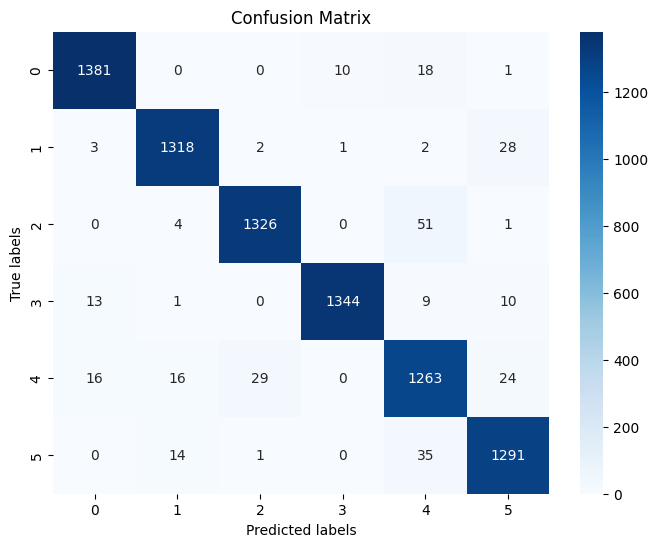

Accuracy: 0.9648075986361422
F1-score: 0.9649115008240613

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1410
           1       0.97      0.97      0.97      1354
           2       0.98      0.96      0.97      1382
           3       0.99      0.98      0.98      1377
           4       0.92      0.94      0.93      1348
           5       0.95      0.96      0.96      1341

    accuracy                           0.96      8212
   macro avg       0.96      0.96      0.96      8212
weighted avg       0.97      0.96      0.96      8212



In [ ]:
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Train your model on the entire training set (without cross-validation)
startTime = time.time()
model.fit(Xf_train, Yf_train)
endTime = time.time()

print('Time to Train:',endTime-startTime,'Sec')


# Make predictions on the test set
startTime = time.time()
Yf_pred = model.predict(Xf_test)
endTime = time.time()

print('Time to Test:',endTime-startTime,'Sec')

# Compute the confusion matrix
conf_matrix = confusion_matrix(Yf_test, Yf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(Yf_test, Yf_pred)
f1 = f1_score(Yf_test, Yf_pred, average='weighted')  # You can choose 'macro' or 'micro' as well

print('Accuracy:', accuracy)
print('F1-score:', f1)

from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(Yf_test, Yf_pred)

print('\nClassification Report')
print('-----------------------')
# Print classification report
print(report)

####5.5.4 Identify featuers of importance

##### Obtain a copy of the cleaned data

We obtain a copy of the cleaned and encoded data.

In [ ]:
dfFeatureAnalysis = dfPrep.copy()

##### Calculate significance of each feature

In [ ]:
# Partioning the data
Xc = dfFeatureAnalysis.drop('Activity', axis=1)
yc = dfFeatureAnalysis['Activity']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,X1,9.806766
1,Y1,12.145197
2,Z1,10.831237
3,X2,3.971839
4,Y2,3.575435
5,Z2,5.087299
6,X3,4.103675
7,Y3,4.500595
8,Z3,1.917427
9,X4,8.044045


##### Display significance of each feature

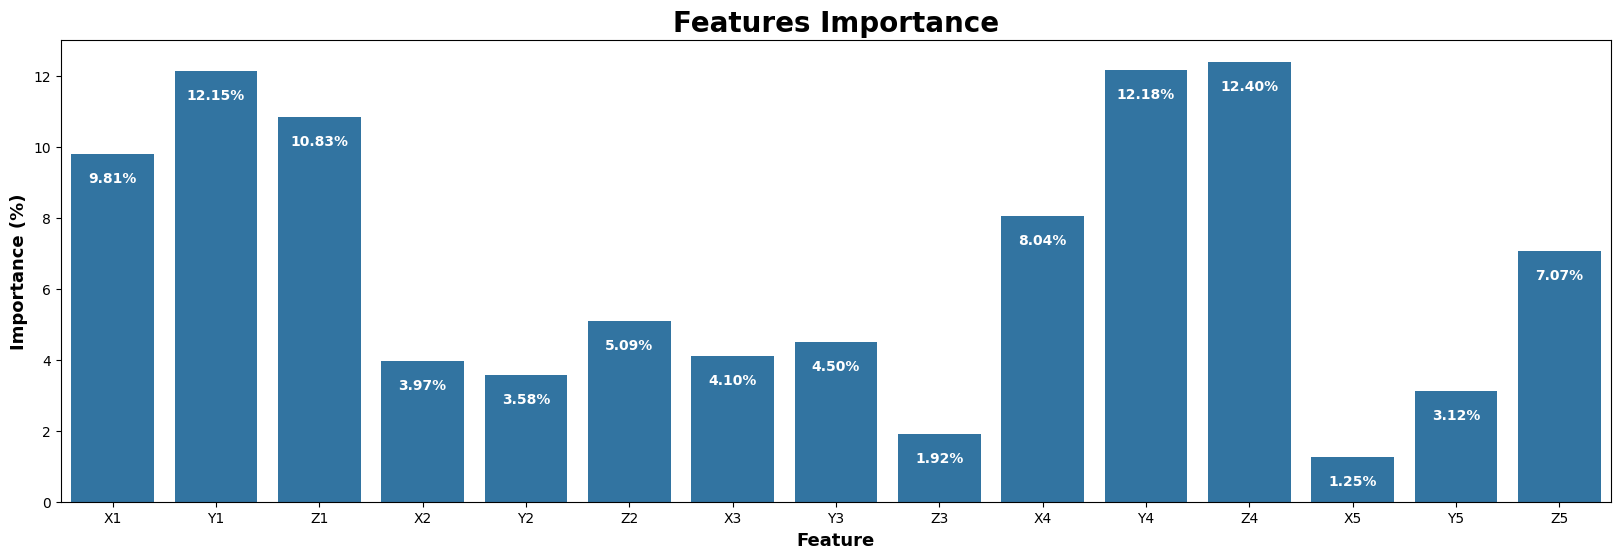

In [ ]:
# Features importance plot
plt.figure(figsize=[20,6])
sns.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

It can be observed that the most significant features are Y4 nad Z4. Further, the least significant features are X5 and X3. In the context of this application, we have to consider a group of features (X,Y, Z) belongs to one sensor at once. Therefore, the sensors which has most significant impact to the result are sensor 1 (features X1, Y1, and Z1) and sensor 4 (X4,Y4, and Z4)

####5.5.5 Run the model with most significant features

##### Remove the less signiticant features

In [ ]:
dfFinal = dfPrep.copy()
dfFinal.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
dfFinal.head(2)

dfFinal.shape

(169419, 7)

##### Undersample the data

In [ ]:
xf = dfFinal.drop('Activity', axis=1)
yf = dfFinal['Activity']

# Perform random under-sampling
rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
xf_resampled, yf_resampled = rus.fit_resample(xf, yf)

# Check the class distribution after under-sampling
print("\nClass distribution after under-sampling:")
print(yf_resampled.value_counts())



Class distribution after under-sampling:
0    6843
1    6843
2    6843
3    6843
4    6843
5    6843
Name: Activity, dtype: int64


##### Run the model and obtain the evaluation parameters

Time to Train: 5.450316667556763 Sec
Time to Test: 0.1401653289794922 Sec


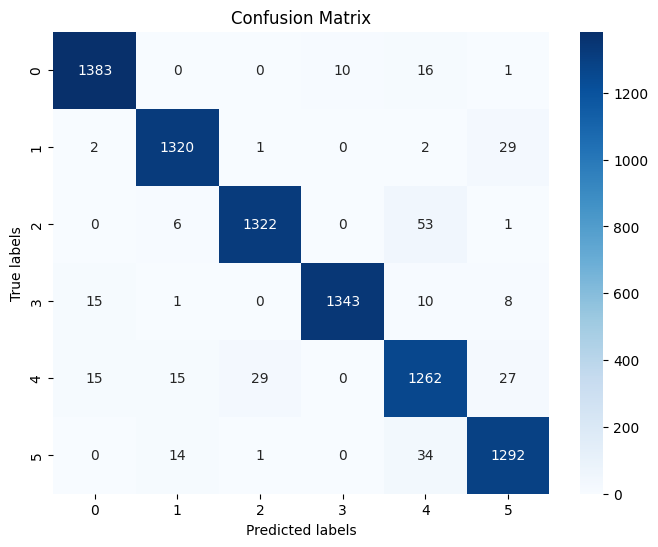

Accuracy: 0.9646858256210423
F1-score: 0.9647873719906737

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1410
           1       0.97      0.97      0.97      1354
           2       0.98      0.96      0.97      1382
           3       0.99      0.98      0.98      1377
           4       0.92      0.94      0.93      1348
           5       0.95      0.96      0.96      1341

    accuracy                           0.96      8212
   macro avg       0.96      0.96      0.96      8212
weighted avg       0.96      0.96      0.96      8212



In [ ]:
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(xf_resampled, yf_resampled, test_size=0.2, random_state=42)

# Train your model on the entire training set (without cross-validation)
startTime = time.time()
model.fit(Xf_train, Yf_train)
endTime = time.time()

print('Time to Train:',endTime-startTime,'Sec')

# Make predictions on the test set
startTime = time.time()
Yf_pred = model.predict(Xf_test)
endTime = time.time()

print('Time to Test:',endTime-startTime,'Sec')

# Compute the confusion matrix
conf_matrix = confusion_matrix(Yf_test, Yf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(Yf_test, Yf_pred)
f1 = f1_score(Yf_test, Yf_pred, average='weighted')  # You can choose 'macro' or 'micro' as well

print('Accuracy:', accuracy)
print('F1-score:', f1)

from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(Yf_test, Yf_pred)

print('\nClassification Report')
print('-----------------------')
# Print classification report
print(report)

#### 5.5.6 Handling the data as a time-series data


So far, we have considered one data sample received from sensors (each line consisting of he 15 features) as one data point. However, in reality, one unit of human activity lasts for a number of samples (a frame). Therefore, we have to consider the following.


1.   Each data frame should contain a number of data points each having same set of features, making it a two dimensional arrray.
2.   The data samples are received in a sequence making it undesirable to rendomly remove samples in between when dropping the null values and during under sampling. hence, we will try to remove the numm values at the end of a data set and apply interpolation to approximate the missing values.
1.   We can't remove the duplicating records as they can be valid information in a data frame.






##### Check for NULL records

In [5]:
#Check for Null records
for index in range(0,6):
  print(activityList[index])
  print('.................')
  print(raw_data[index].isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          1
Y1          1
Z1          1
X2          1
Y2          1
Z2          1
X3          1
Y3          1
Z3          1
X4          1
Y4          1
Z4          1
X5          1
Y5          1
Z5          1
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          2219
Y1          2219
Z1          2219
X2          2219
Y2          2219
Z2          2219
X3          2219
Y3          2219
Z3          2219
X4          2219
Y4          2219

##### Remove NULL records

Remove NULL records at the end and interpolate to replace NULLs in the middle

In [6]:
data_wihtout_NULLs = raw_data.copy()

for dfm in data_wihtout_NULLs:
    # Remove rows with NULL values at the end
    dfm.dropna(axis=0, how='all', inplace=True)

    # Interpolate NULL values in the middle
    for col in dfm.columns:
        # Check if there are NULL values in the middle of the column
        if dfm[col].isnull().any():
            # Interpolate NULL values using linear interpolation
            dfm[col] = dfm[col].interpolate(method='linear')

for index in range(0,6):
  print(activityList[index])
  print('.................')
  print(data_wihtout_NULLs[index].isna().sum())
  print('\n')

  # Display the shape of each dataset after removing Nulls
for index in range(0,6):
  print(activityList[index],':',data_wihtout_NULLs[index].shape)

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5  

For the comparison purposes, we will create two data sets.

1.   Apply under smapling, which would randomly remove certain rows
2.   Truncate the data set to the size of the samllest



##### Balancing the data sets

Randomly remove rows of each data set to make them equal in size

In [12]:
dataRandUSampled = []
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([data_wihtout_NULLs[index].shape[0] for index in range(6)])
print("Undersampling to size:", smallestSize)
for index in range(6):
    # If this dataset is larger than the smallest one, perform undersampling
    if data_wihtout_NULLs[index].shape[0] > smallestSize:
        # Randomly select rows for the dataset
        selectedRows = np.random.choice(data_wihtout_NULLs[index].shape[0], size=smallestSize, replace=False)
        # Keep only the selected rows
        dataRandUSampled.append(data_wihtout_NULLs[index].iloc[selectedRows])
    else:
        dataRandUSampled.append(data_wihtout_NULLs[index])

# Display the shape of each dataset after random undersampling
for index in range(0,6):
  print(activityList[index],':',dataRandUSampled[index].shape)
print('')
#Each data label set is indexed
for index in range(0,6):
  dataRandUSampled[index]['Activity']= index
  print(dataRandUSampled[index].head(2))


Undersampling to size: 6844
cycling : (6844, 16)
pushup : (6844, 16)
run : (6844, 16)
squat : (6844, 16)
tennis : (6844, 16)
walk : (6844, 16)

        X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
40532  443  463  419  595  547  547  352  467  549  534  551  341  531  365   
13977  448  571  431  596  589  552  385  532  548  559  526  401  535  387   

        Z5  Activity  
40532  552         0  
13977  529         0  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  448.0  372.0  451.0  410.0  528.0         1  
1  514.0  420.0  490.0  452.0  584.0         1  
       X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
2236  299  648  484  914  328  564  250  981  621  428  697  455  507  348   
2540  581  751  415 

Remove the rows at the end of each data set to make them equal in size

In [13]:
dataTruncated = []
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([data_wihtout_NULLs[index].shape[0] for index in range(6)])
print("Undersampling to size:", smallestSize)

for df in data_wihtout_NULLs:
    dataTruncated.append(df.iloc[:smallestSize, :])

# Display the shape of each dataset after random undersampling
for index in range(0,6):
  print(activityList[index],':',dataTruncated[index].shape)
print('')
#Each data label set is indexed
for index in range(0,6):
  dataTruncated[index]['Activity']= index
  print(dataTruncated[index].head(2))

Undersampling to size: 6844
cycling : (6844, 16)
pushup : (6844, 16)
run : (6844, 16)
squat : (6844, 16)
tennis : (6844, 16)
walk : (6844, 16)

    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   

   Activity  
0         0  
1         0  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  448.0  372.0  451.0  410.0  528.0         1  
1  514.0  420.0  490.0  452.0  584.0         1  
    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  328  453  395  581  449  489  319  427  449  528  462  388  431  313  416   
1  373  513  447  622  488  525  363  48

##### Concatiate data


Concatiate the data sets to start pre-processng

In [14]:
datasetRSAMP = pd.concat(dataRandUSampled, ignore_index=True) # Random under sampled data
datasetTRUNK = pd.concat(dataTruncated, ignore_index=True) # Truncated data
# Shape of the combined dataset
print("Shape of combined random under sampled dataset:", datasetRSAMP.shape)
print(datasetRSAMP.groupby('Activity').size())
print('')
#print(datasetRSAMP.head(2))
#print('')
print("Shape of combined trunkated dataset:", datasetTRUNK.shape)

print(datasetTRUNK.groupby('Activity').size())
#print('')
#print(datasetTRUNK.head(2))

Shape of combined random under sampled dataset: (41064, 16)
Activity
0    6844
1    6844
2    6844
3    6844
4    6844
5    6844
dtype: int64

Shape of combined trunkated dataset: (41064, 16)
Activity
0    6844
1    6844
2    6844
3    6844
4    6844
5    6844
dtype: int64


##### Pre-Process data

In [27]:
cols_RSAMP = datasetRSAMP.columns

ms = MinMaxScaler()
# Preview the data set
print('\nRandom under sampled data: Before scaling')
print(datasetRSAMP.head(2))

print('\n-----------------------------------------------')

X_RSAMP = ms.fit_transform(datasetRSAMP)
X_RSAMP = pd.DataFrame(X_RSAMP, columns=[cols_RSAMP])
print('\nRandom under sampled data: After scaling')
print(X_RSAMP.head(2))

print('\n==============================================')

cols_TRUNK = datasetTRUNK.columns
# Preview the data set
print('\nTrunkated data: Before scaling')
print(datasetTRUNK.head(2))

print('\n-----------------------------------------------')

X_TRUNK = ms.fit_transform(datasetTRUNK)
X_TRUNK = pd.DataFrame(X_TRUNK, columns=[cols_TRUNK])
print('\nTrunkated data: After scaling')
print(X_TRUNK.head(2))


Random under sampled data: Before scaling
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  443.0  463.0  419.0  595.0  547.0  547.0  352.0  467.0  549.0  534.0   
1  448.0  571.0  431.0  596.0  589.0  552.0  385.0  532.0  548.0  559.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  551.0  341.0  531.0  365.0  552.0         0  
1  526.0  401.0  535.0  387.0  529.0         0  

-----------------------------------------------

Random under sampled data: After scaling
         X1        Y1        Z1        X2        Y2        Z2        X3  \
0  0.607682  0.433367  0.399417  0.415698  0.474099  0.527326  0.437252   
1  0.614540  0.543235  0.416910  0.417151  0.521396  0.534712  0.480845   

         Y3        Z3        X4        Y4        Z4        X5        Y5  \
0  0.341404  0.560876  0.419355  0.419036  0.221420  0.481865  0.529900   
1  0.420097  0.559508  0.449223  0.388133  0.293622  0.492228  0.566445   

         Z5 Activity  
0  0.455390      0

#####Apply CNN model

In [28]:
# Print the column labels
print("Column labels:", X_RSAMP.columns)

Column labels: MultiIndex([(      'X1',),
            (      'Y1',),
            (      'Z1',),
            (      'X2',),
            (      'Y2',),
            (      'Z2',),
            (      'X3',),
            (      'Y3',),
            (      'Z3',),
            (      'X4',),
            (      'Y4',),
            (      'Z4',),
            (      'X5',),
            (      'Y5',),
            (      'Z5',),
            ('Activity',)],
           )


In [43]:
# Assuming you have already loaded and preprocessed your dataset
# data is a list where each element corresponds to a label, containing the samples for that label
# labels is a list where each element corresponds to a label index

Y = X_RSAMP['Activity'].values
X = (X_RSAMP.drop('Activity',axis=1)).values

# Reshape data into frames of 80 samples each
frame_size = 80
stride = 2  # Set stride to control overlap between frames
X_frames = []
Y_frames = []

for dataSetindex in range(0,6):
  startIndex = dataSetindex * smallestSize # smallestSize is the data set size for one label
  for i in range(startIndex, (startIndex+smallestSize) - frame_size, stride):
      X_frames.append(X[i:i+frame_size])
      Y_frames.append(Y[i:i+frame_size][-1])  # Use label of the last sample in each frame

X_frames = np.array(X_frames)
Y_frames = np.array(Y_frames)

# Define CNN model
model = keras.Sequential([
    layers.Input(shape=(frame_size, 15)), # 15 features
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  #  6 labels
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split data into training and testing sets
split = int(0.8 * len(X_frames))
X_train, X_test = X_frames[:split], X_frames[split:]
Y_train, Y_test = Y_frames[:split], Y_frames[split:]

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
203/203 [==============================] - 6s 20ms/step - loss: 0.0254 - accuracy: 0.2590 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
203/203 [==============================] - 3s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2604 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
203/203 [==============================] - 3s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2604 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
203/203 [==============================] - 3s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2604 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
203/203 [==============================] - 3s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2604 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
203/203 [==============================] - 4s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2604 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
203/203 [==============================] - 3s 13ms/step - loss:

In [42]:
my=pd.DataFrame(Y_frames)
my[0].value_counts()

0.0    3382
0.2    3382
0.4    3382
0.6    3382
0.8    3382
1.0    3382
Name: 0, dtype: int64

In [ ]:
#models = []f
#models.append(('KNN1',KNeighborsClassifier(n_neighbors=1)))
#models.append(('KNN2',KNeighborsClassifier(n_neighbors=2)))
#models.append(('KNN3',KNeighborsClassifier(n_neighbors=3)))
#models.append(('KNN4',KNeighborsClassifier(n_neighbors=4)))
#models.append(('KNN5',KNeighborsClassifier(n_neighbors=5)))
#models.append(('KNN6',KNeighborsClassifier(n_neighbors=6)))
#models.append(('KNN7',KNeighborsClassifier(n_neighbors=7)))

In [ ]:
for model_name, model in models:   # a loop to choose the model defined in the above code
    results = cross_validate(model, x, y, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=True)

    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1_macro'].mean(), '| test: ', results['test_f1_macro'].mean())
    print("---------------------------------------------------------")

KNN1:
Accuracy: train:  1.0 | test:  0.9560731362985739
F1-score: train:  1.0 | test:  0.9516276071331472
---------------------------------------------------------
KNN2:
Accuracy: train:  0.9988239214795694 | test:  0.9545562330806833
F1-score: train:  0.9988454570653337 | test:  0.9496172411783851
---------------------------------------------------------
KNN3:
Accuracy: train:  0.9979901894317852 | test:  0.9580741125761003
F1-score: train:  0.9977950227133257 | test:  0.9520189718807135
---------------------------------------------------------
KNN4:
Accuracy: train:  0.997379278101177 | test:  0.9578911599222157
F1-score: train:  0.9971391867131201 | test:  0.9522252174224575
---------------------------------------------------------
KNN5:
Accuracy: train:  0.9964968501554743 | test:  0.958941792144782
F1-score: train:  0.9961446415124694 | test:  0.9527578788885614
---------------------------------------------------------
KNN6:
Accuracy: train:  0.9955937636224412 | test:  0.95826892

In [ ]:
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([dataWithoutNulls[index].shape[0] for index in range(6)])
print("Undersampling to size:", smallestSize)

for index in range(6):
    # If this dataset is larger than the smallest one, perform undersampling
    if dataWithoutNulls[index].shape[0] > smallestSize:
        # Randomly select rows for the dataset
        selectedRows = np.random.choice(dataWithoutNulls[index].shape[0], size=smallestSize, replace=False)
        # Keep only the selected rows
        dataWithoutNulls[index] = dataWithoutNulls[index].iloc[selectedRows]

# Display the shape of each dataset after random undersampling
for index in range(0,6):
  print(activityList[index],':',dataWithoutNulls[index].shape)

Undersampling to size: 6843
cycling : (6843, 16)
pushup : (6843, 16)
run : (6843, 16)
squat : (6843, 16)
tennis : (6843, 16)
walk : (6843, 16)


####5.4 Visualize the data

##### First six features

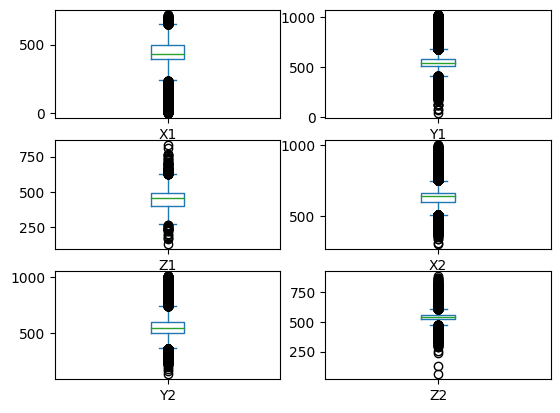

In [ ]:
selectedFeatures = dataset.iloc[:, :6]  # Selecting the first 5 columns, adjust as needed
selectedFeatures.plot(kind='box',subplots=True, layout=(3,2),sharex=False,sharey=False)
plt.show()

##### Second six features

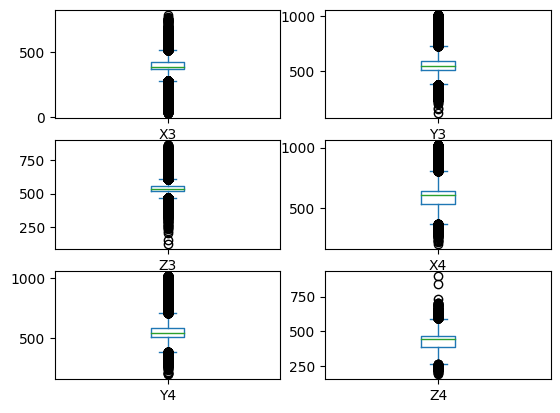

In [ ]:
selectedFeatures = dataset.iloc[:, 6:12]  # Selecting the first 5 columns, adjust as needed
selectedFeatures.plot(kind='box',subplots=True, layout=(3,2),sharex=False,sharey=False)
plt.show()

#####Last three

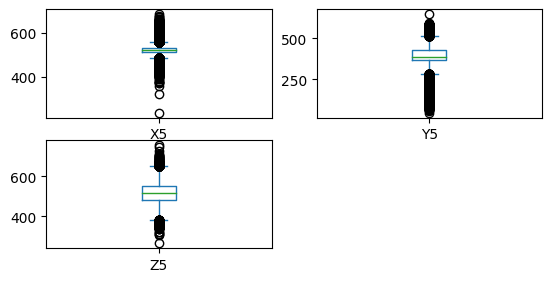

In [ ]:
selectedFeatures = dataset.iloc[:, 12:16]  # Selecting the first 5 columns, adjust as needed
selectedFeatures.plot(kind='box',subplots=True, layout=(3,2),sharex=False,sharey=False)
plt.show()

##### Histogram of all features

In [ ]:
#dataset.hist()
#plt.show()

selectedFeatures = dataset.iloc[:, :6]  # Selecting the first 5 columns, adjust as needed

# Plot histograms for each selected column
selectedFeatures.hist(figsize=(10, 6))  # Adjust the figsize as needed
plt.show()

selectedFeatures = dataset.iloc[:,6:12]  # Selecting the first 5 columns, adjust as needed

# Plot histograms for each selected column
selectedFeatures.hist(figsize=(10, 6))  # Adjust the figsize as needed
plt.show()

selectedFeatures = dataset.iloc[:,12:16]  # Selecting the first 5 columns, adjust as needed

# Plot histograms for each selected column
selectedFeatures.hist(figsize=(10, 6))  # Adjust the figsize as needed
plt.show()

NameError: name 'dataset' is not defined

##### Correlation matrix between features

In [ ]:
matrix = dataset.corr(numeric_only=True)
print(matrix)

          X1        Y1        Z1        X2        Y2        Z2        X3  \
X1  1.000000 -0.150185 -0.276520 -0.085292  0.209078 -0.068626 -0.267455   
Y1 -0.150185  1.000000  0.014944  0.044255  0.089019  0.016128 -0.046096   
Z1 -0.276520  0.014944  1.000000  0.105878 -0.057534  0.078729 -0.011211   
X2 -0.085292  0.044255  0.105878  1.000000 -0.263641  0.096909 -0.291143   
Y2  0.209078  0.089019 -0.057534 -0.263641  1.000000  0.354562  0.097573   
Z2 -0.068626  0.016128  0.078729  0.096909  0.354562  1.000000 -0.022225   
X3 -0.267455 -0.046096 -0.011211 -0.291143  0.097573 -0.022225  1.000000   
Y3 -0.333433 -0.189107  0.137816 -0.012835 -0.244643  0.017112  0.245264   
Z3 -0.225922 -0.067670  0.221394  0.136687 -0.081827  0.159501 -0.000998   
X4 -0.221071  0.470232  0.033962 -0.175733  0.261981  0.134782 -0.072391   
Y4 -0.447454  0.630131  0.214122  0.166431 -0.174762  0.030967  0.102512   
Z4  0.024006  0.144076  0.469300 -0.055019  0.218421  0.013588 -0.177981   
X5 -0.120158

##### Heatmap of the correlatoin matrix

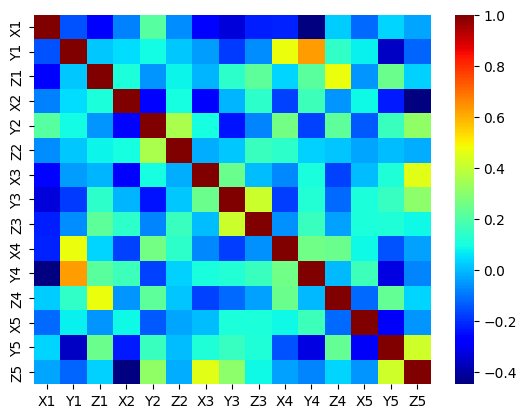

In [ ]:
import seaborn as sns
#sns.heatmap(matrix,cmap="coolwarm")
sns.heatmap(matrix,cmap="jet")
plt.show()

Y4 and Y1 shows the highest correlation which is 0.63. That is the movement of left and right hand in the direction of Y axiz of the accellerometer.

####3.6 Split data into training and testing data

In [ ]:
array = dataset.values
# Extract the first four columns into variable x
#x = array.iloc[:, :15]
x = array[:,0:15]

# Extract the fifth column into variable y
#y = array.iloc[:, ]
y = array[:,15]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

##### Visualize the train and test data

In [ ]:
print(X_train[0:4])
print(Y_train[0:4])
print(X_test[0:4])
print(Y_test[0:4])

[[379.0 509.0 514.0 612.0 529.0 485.0 392.0 529.0 556.0 672.0 530.0 505.0
  547.0 471.0 618.0]
 [365.0 425.0 540.0 841.0 327.0 506.0 303.0 658.0 591.0 327.0 523.0 462.0
  548.0 523.0 531.0]
 [386.0 497.0 501.0 539.0 627.0 546.0 480.0 629.0 533.0 637.0 537.0 457.0
  521.0 422.0 590.0]
 [535.0 512.0 393.0 631.0 549.0 551.0 385.0 549.0 537.0 520.0 508.0 376.0
  520.0 401.0 499.0]]
['Pushup' 'Run' 'Pushup' 'Squat']
[[522.0 510.0 376.0 645.0 500.0 516.0 382.0 506.0 517.0 508.0 457.0 379.0
  519.0 382.0 474.0]
 [384.0 511.0 499.0 537.0 624.0 567.0 482.0 631.0 547.0 639.0 535.0 460.0
  521.0 424.0 604.0]
 [491.0 487.0 382.0 647.0 517.0 528.0 382.0 510.0 529.0 532.0 477.0 361.0
  531.0 382.0 483.0]
 [353.0 568.0 654.0 657.0 471.0 527.0 381.0 500.0 537.0 640.0 517.0 453.0
  532.0 343.0 500.0]]
['Squat' 'Pushup' 'Squat' 'Table Tenis']


####3.7 Running Models

##### 3.7.1 KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('KNN1',KNeighborsClassifier(n_neighbors=1)))
models.append(('KNN2',KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN3',KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN4',KNeighborsClassifier(n_neighbors=4)))
models.append(('KNN5',KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN6',KNeighborsClassifier(n_neighbors=4)))
models.append(('KNN7',KNeighborsClassifier(n_neighbors=5)))

#Evaluation matrixes
results = []
names = []

for name, model in models:
  kfold = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)

  print('%s: %f: (%f)'%(name,cv_results.mean(),cv_results.std()))

KNN1: 0.989983: (0.001603)
KNN2: 0.987791: (0.001591)
KNN3: 0.986909: (0.001795)
KNN4: 0.985934: (0.001763)
KNN5: 0.985478: (0.002130)
KNN6: 0.985934: (0.001763)
KNN7: 0.985478: (0.002130)
